In [22]:
%pip install kaggle


Note: you may need to restart the kernel to use updated packages.


In [23]:
import os

print(os.getcwd())  # shows current working directory
print(os.listdir('dogs-vs-cats/train'))  # shows files present


/mnt/Files/Python Project/Dog vs Cat
['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg', 'cat.10000.jpg', 'cat.10001.jpg', 'cat.10002.jpg', 'cat.10003.jpg', 'cat.10004.jpg', 'cat.10005.jpg', 'cat.10006.jpg', 'cat.10007.jpg', 'cat.10008.jpg', 'cat.10009.jpg', 'cat.1001.jpg', 'cat.10010.jpg', 'cat.10011.jpg', 'cat.10012.jpg', 'cat.10013.jpg', 'cat.10014.jpg', 'cat.10015.jpg', 'cat.10016.jpg', 'cat.10017.jpg', 'cat.10018.jpg', 'cat.10019.jpg', 'cat.1002.jpg', 'cat.10020.jpg', 'cat.10021.jpg', 'cat.10022.jpg', 'cat.10023.jpg', 'cat.10024.jpg', 'cat.10025.jpg', 'cat.10026.jpg', 'cat.10027.jpg', 'cat.10028.jpg', 'cat.10029.jpg', 'cat.1003.jpg', 'cat.10030.jpg', 'cat.10031.jpg', 'cat.10032.jpg', 'cat.10033.jpg', 'cat.10034.jpg', 'cat.10035.jpg', 'cat.10036.jpg', 'cat.10037.jpg', 'cat.10038.jpg', 'cat.10039.jpg', 'cat.1004.jpg', 'cat.10040.jpg', 'cat.10041.jpg', 'cat.10042.jpg', 'cat.10043.jpg', 'cat.10044.jpg', 'cat.10045.jpg', 'cat.10046.jpg', 'cat.10047.jpg', 'cat.10048.

In [24]:
import os

path, _, files = next(os.walk('dogs-vs-cats/train'))
file_count = len(files)
print("Number of images:", file_count)


Number of images: 25000


In [25]:
import numpy as np 
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg 
from sklearn.model_selection import train_test_split
import cv2 as cv

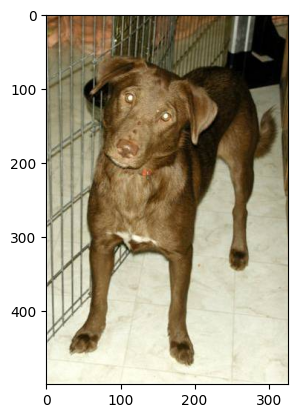

In [26]:
img = mpimg.imread('dogs-vs-cats/train/dog.1.jpg')
imgplt = plt.imshow(img)
plt.show()

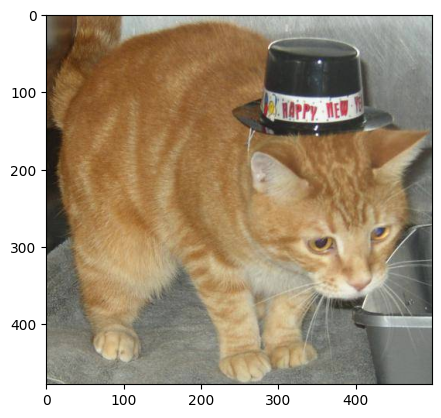

In [27]:
img = mpimg.imread('dogs-vs-cats/train/cat.4121.jpg')
imgplt = plt.imshow(img)
plt.show()

In [28]:
file_names = os.listdir('dogs-vs-cats/train')
for i in range(5):
    name = file_names[i]
    print(name[:3])

cat
cat
cat
cat
cat


In [29]:
file_names = os.listdir('dogs-vs-cats/train')

dog_count = 0
cat_count = 0

for img_file in file_names:
    
    name = img_file[0:3]
    
    if name == 'dog':
        dog_count += 1
    else:
        cat_count +=1
        
print(dog_count)
print(cat_count)

12500
12500


In [30]:
original_folder = 'dogs-vs-cats/train'
resized_folder= 'dogs-vs-cats/image_resized'

In [31]:
import tensorflow as tf

2025-09-27 07:45:53.936219: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.
2025-09-27 07:45:54.260120: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-27 07:45:55.645832: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:31] Could not find cuda drivers on your machine, GPU will not be used.


In [33]:
original_folder = 'dogs-vs-cats/train/'
resized_folder = 'dogs-vs-cats/image_resized/'

for i in range(25000):

  filename = os.listdir(original_folder)[i]
  img_path = original_folder+filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder+filename
  img.save(newImgPath)

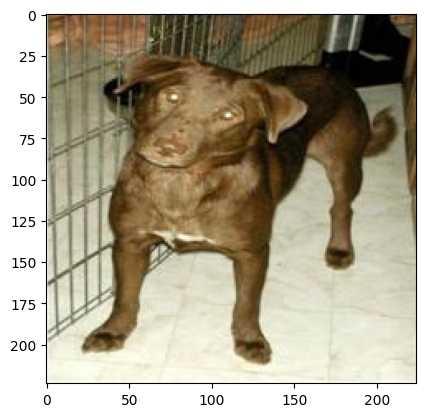

In [34]:
img = mpimg.imread('dogs-vs-cats/image_resized/dog.1.jpg')
imgplt = plt.imshow(img)
plt.show()

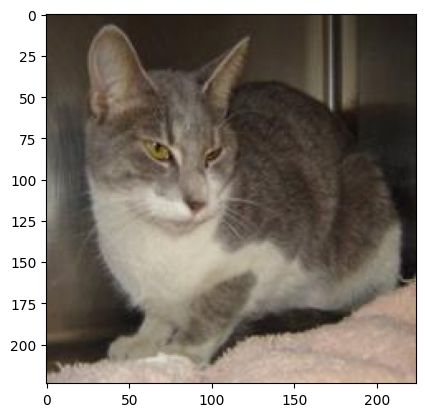

In [35]:
img = mpimg.imread('dogs-vs-cats/image_resized/cat.4352.jpg')
imgplt = plt.imshow(img)
plt.show()

In [36]:
filenames = os.listdir('dogs-vs-cats/image_resized')

labels = []

for i in range(25000):
    file_name = filenames[i]
    label=file_name[0:3]
    
    if label == 'dog':
        labels.append(1)
    else:
        labels.append(0)
        

In [37]:

print(filenames[0:5])
print(len(filenames))

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.1000.jpg']
25000


In [38]:
print(labels[0:5])
print(len(labels))

[0, 0, 0, 0, 0]
25000


In [39]:
values, counts = np.unique(labels,return_counts=True)
print(values)
print(counts)

[0 1]
[12500 12500]


In [40]:
import cv2
import glob



In [48]:
image_directory = 'dogs-vs-cats/image_resized/'
image_extension = ['png','jpg']

files = []

for e in image_extension:
    files.extend(glob.glob(image_directory+'*.'+e))
dog_cat_images = np.asarray([cv2.imread(file) for file in files])

In [49]:
print(dog_cat_images)


[[[[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [122 200 246]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 203 246]
   [123 201 247]
   [122 200 246]]

  [[ 87 163 205]
   [ 89 165 207]
   [ 92 168 210]
   ...
   [124 204 245]
   [123 202 245]
   [123 202 245]]

  ...

  [[ 55 123 160]
   [ 55 123 160]
   [ 56 124 161]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 53 121 158]
   [ 54 122 159]
   [ 55 123 160]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]

  [[ 52 120 157]
   [ 52 120 157]
   [ 53 121 158]
   ...
   [  0   1   1]
   [  0   1   1]
   [  0   1   1]]]


 [[[ 43  43  37]
   [ 47  47  41]
   [ 47  47  41]
   ...
   [185 205 210]
   [173 197 203]
   [164 192 199]]

  [[ 42  42  36]
   [ 46  46  40]
   [ 45  45  39]
   ...
   [180 200 205]
   [169 195 201]
   [167 195 202]]

  [[ 42  42  36]
   [ 44  44  38]
   [ 43  43  37]
   ...
   [172 192 197]
   [167 193 200]
   [171 198

In [50]:
type(dog_cat_images)

numpy.ndarray

In [51]:
print(dog_cat_images.shape)

(25000, 224, 224, 3)


In [52]:
X = dog_cat_images
y=np.asarray(labels)

In [55]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [56]:
print(X.shape, X_train.shape, X_test.shape)


(25000, 224, 224, 3) (20000, 224, 224, 3) (5000, 224, 224, 3)


In [58]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [59]:
datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
import os
import shutil

# Path to your folder containing all images
image_dir = 'dogs-vs-cats/image_resized'

# Paths to class folders
dog = os.path.join(image_dir, 'dog')
cat = os.path.join(image_dir, 'cat')

# Create class folders if they don't exist
os.makedirs(dog, exist_ok=True)
os.makedirs(cat, exist_ok=True)

# Move images to respective folders
for file in os.listdir(image_dir):
    file_path = os.path.join(image_dir, file)
    
    # Skip directories
    if os.path.isdir(file_path):
        continue
    
    if 'dog' in file.lower():
        shutil.move(file_path, os.path.join(dog_dir, file))
    elif 'cat' in file.lower():
        shutil.move(file_path, os.path.join(cat_dir, file))


In [60]:
train_generator = datagen.flow_from_directory(
    'dogs-vs-cats/image_resized',
    target_size=(224,224),
    batch_size = 32,
    class_mode = 'binary'
)

Found 0 images belonging to 0 classes.
